# KMer test for nucleotidic composition

In [25]:
from sklearn.preprocessing import StandardScaler
from src.si.IO.csv_file import read_csv
from src.si.feature_extraction.k_mer import KMer
from src.si.model_selection.split import train_test_split
from src.si.linear_model.logistic_regression import LogisticRegression

In [26]:
tfbs_path = "/home/rui/Desktop/universidade/SIB/si/datasets/tfbs.csv"
tfbs = read_csv(tfbs_path, features=True, label=True)
tfbs.print_dataframe()

,sequence
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
0,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
0,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
1,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
1,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
...,...
0,GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...
1,GTTCGCAGCGTATTGAGTAATGTTTGACTCGACCGAACTCCATATT...
0,ACTCGCTGTCCACGTCTATTCCTAGGGGTTTTATTTCGCAAGGTGA...
1,TGCAAAGGGGCGACCGAACTCCCTTTACCGCGGAGTTATTCATAAT...


In [27]:
k_mer = KMer(k=3, alphabet="DNA")
kmer_dataset = k_mer.fit_transform(tfbs)
kmer_dataset.print_dataframe()

,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,ATC,...,GCT,GCG,GTA,GTC,GTT,GTG,GGA,GGC,GGT,GGG
0,0.00,0.02,0.00,0.02,0.02,0.04,0.00,0.00,0.00,0.00,...,0.04,0.02,0.00,0.00,0.04,0.00,0.04,0.04,0.02,0.06
0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,...,0.00,0.06,0.02,0.04,0.06,0.02,0.00,0.02,0.02,0.00
0,0.04,0.04,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.02,0.04
1,0.00,0.02,0.00,0.00,0.00,0.10,0.02,0.02,0.00,0.00,...,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.00
1,0.00,0.08,0.00,0.00,0.00,0.04,0.06,0.00,0.04,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.06,0.00,0.06,0.00,0.02,0.04,0.00,0.02,0.02
1,0.00,0.02,0.02,0.00,0.00,0.02,0.04,0.00,0.02,0.00,...,0.00,0.02,0.04,0.02,0.04,0.00,0.00,0.00,0.00,0.00
0,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.02,0.02,0.00,...,0.02,0.00,0.00,0.04,0.02,0.02,0.00,0.00,0.04,0.04
1,0.02,0.02,0.02,0.02,0.00,0.04,0.02,0.00,0.02,0.00,...,0.00,0.04,0.00,0.00,0.02,0.00,0.02,0.02,0.00,0.04


In [28]:
kmer_dataset.X = StandardScaler().fit_transform(kmer_dataset.X)

In [29]:
train, test = train_test_split(kmer_dataset)

In [30]:
lg_model = LogisticRegression(max_iter=5000)
lg_model.fit(train)

In [31]:
lg_model.score(test)

0.9625

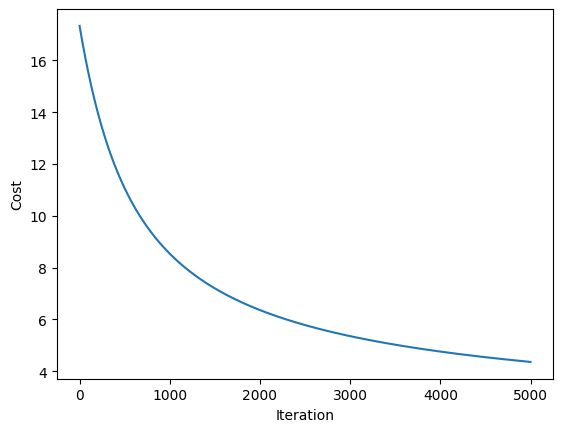

In [32]:
lg_model.plot_cost_history()

## For peptidic composition

In [33]:
transporter_path = "/home/rui/Desktop/universidade/SIB/si/datasets/transporters.csv"
transporter = read_csv(transporter_path, features=True, label=True)

In [34]:
transporter.print_dataframe()

,Sequence
1,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
0,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
1,MELKNKKLSLWEAVSMAVGVMIGASIFSIFGVGAKIAGRNLPETFI...
0,MHLPSLSVALALVSSSLALPQAVLPENDVSSRAAAVKEAFSHAWDG...
0,MEELVGLREGFSGDPVTLQELWGPCPHIRRAIQGGLEWLKQKVFRL...
...,...
0,MKIKDALIKAYSVLKETNDEFYMEDSQILLSYVLKKDRIFLITNRE...
1,MSIATIVPENAVIGQAVNIRSMETDIVSLDDRLLQAFSGSAIATAV...
1,MTAYIQRSQCISTSLLVVLTTLVSCQIPRDRLSNIGVIVDEGKSLK...
1,MTEASEINLSDIKGPIDVNTPITNHRTALIQNYSTKPKLTYQTVFG...


In [35]:
kmer_peptidic = KMer(k=3, alphabet="PROT")
kmer_peptidic_data = kmer_peptidic.fit_transform(transporter)

In [36]:
kmer_peptidic_data.print_dataframe()

,FFF,FFL,FFI,FFM,FFV,FFS,FFP,FFT,FFA,FFY,...,GGH,GGQ,GGN,GGK,GGD,GGE,GGC,GGW,GGR,GGG
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.002967,0.000000,0.0,0.000000,0.0,0.0,0.002967,0.000000
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001261,0.0,...,0.0,0.0,0.000000,0.001261,0.0,0.000000,0.0,0.0,0.001261,0.001261
1,0.000000,0.002299,0.002299,0.0,0.000000,0.0,0.0,0.002299,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.002299,0.000000
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.002028,0.002028
0,0.001456,0.001456,0.000000,0.0,0.001456,0.0,0.0,0.000000,0.001456,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.003509,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001996,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [38]:
kmer_peptidic_data.X = StandardScaler().fit_transform(kmer_peptidic_data.X)

In [39]:
train, test = train_test_split(kmer_peptidic_data)

In [40]:
lg_model_peptidic = LogisticRegression(max_iter=2000)
lg_model_peptidic.fit(train)

In [41]:
lg_model_peptidic.score(test)

0.7661691542288557

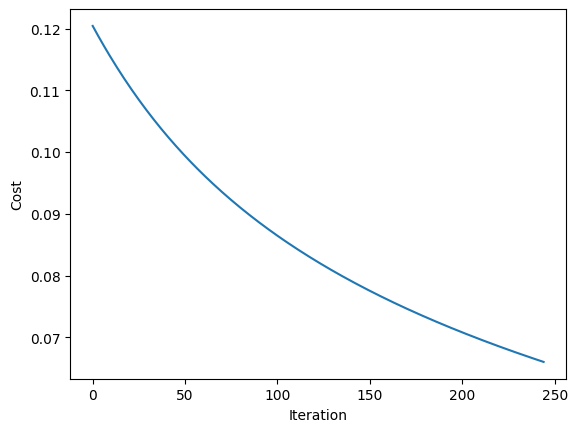

In [42]:
lg_model_peptidic.plot_cost_history()